<h1>Collision Plot

<h3>Import

In [11]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m

import matplotlib.pyplot as plt

import seaborn as sns

<h3>Collisions

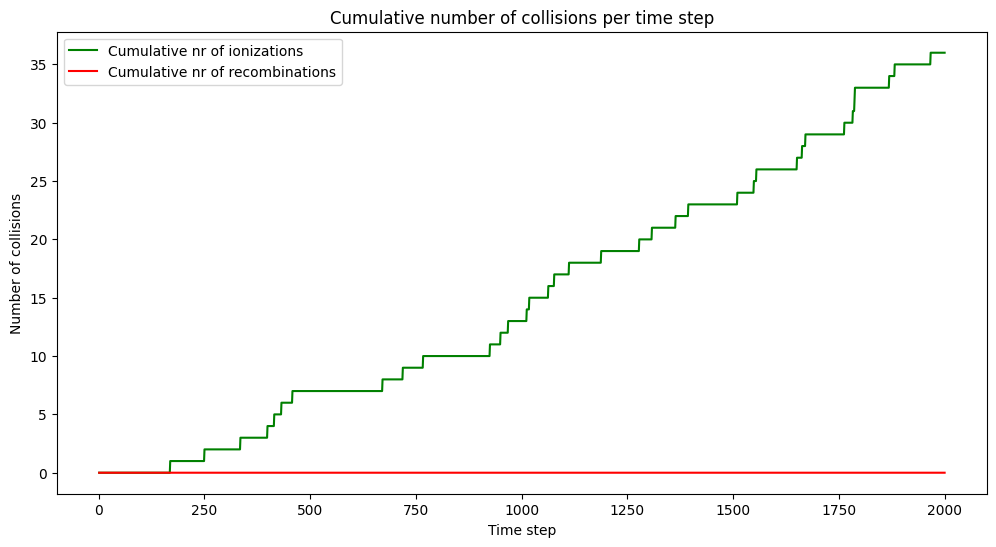

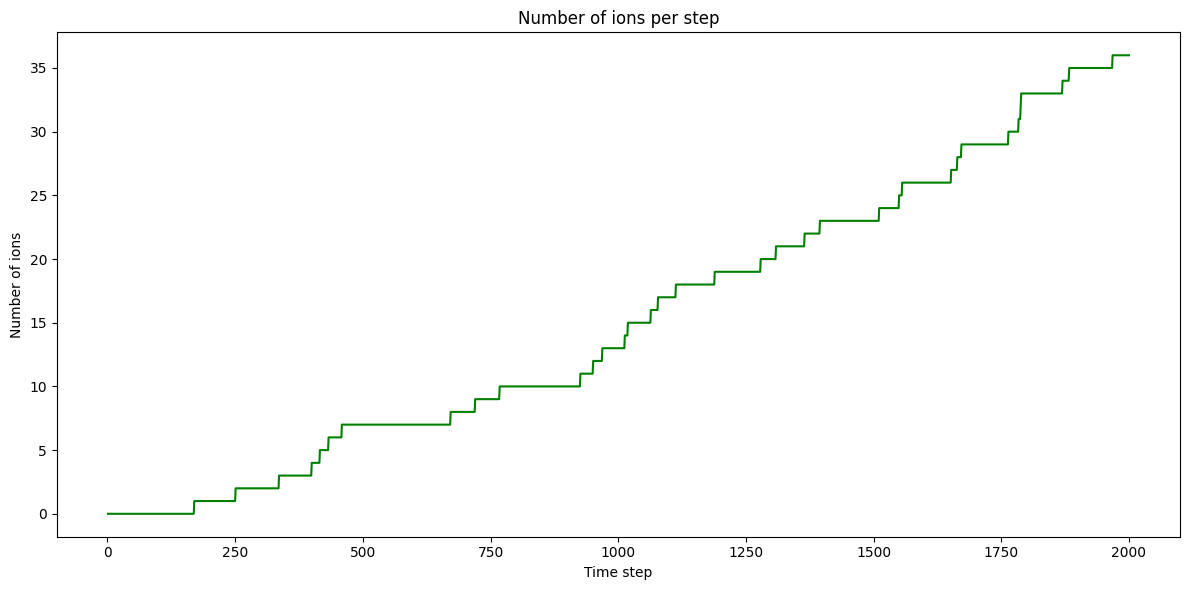

In [12]:
N = 2000

# Collisions
# Read the data into a pandas dataframe
filename = '../out/collisions.dt'
df_coll = pd.read_csv(filepath_or_buffer=filename, index_col=1, delim_whitespace=True, \
                    header=None, names=['step', 'nrColl', 'nrIon', 'nrRecom'])[:N]

# Plot a cumulative plot of nrIon and nrRecom
plt.figure(figsize=(12, 6))
plt.plot(df_coll['step'], df_coll['nrIon'].cumsum(), label='Cumulative nr of ionizations', color='g')
plt.plot(df_coll['step'], df_coll['nrRecom'].cumsum(), label='Cumulative nr of recombinations', color='r')
plt.xlabel('Time step')
plt.ylabel('Number of collisions')
plt.title('Cumulative number of collisions per time step')
plt.legend()
plt.show()

# Ramo current
# Read the data into a pandas dataframe
filename = '../out/ramo_current.dt'
df_cur = pd.read_csv(filepath_or_buffer=filename, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])[:N]

plt.figure(figsize=(12, 6)) 
plt.plot(df_cur.index, df_cur['nrIon'], label='nrIon', color='g')
plt.xlabel('Time step')
plt.ylabel('Number of ions')
plt.title('Number of ions per step')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


<!-- Collision data -->

In [13]:
# recom_filename = '../out/recombination_data.bin'
# recom_dt_abs_type = np.dtype([('step', np.int64), ('x', np.float64), ('y', np.float64), ('z', np.float64), ('vel', np.float64), ('dist', np.float64), ('kramers', np.float64), ('elec_id', np.int64), ('ion_id', np.int64), ('elec_emit', np.int64), ('life', np.int64)])
# recom_data_mem_abs = np.memmap(recom_filename, dtype=recom_dt_abs_type, mode='r', order='F')
# recom_data = pd.DataFrame(recom_data_mem_abs)

ion_filename = '../out/ionization_data.bin'
ion_dt_abs_type = np.dtype([('step', np.int64), ('x', np.float64), ('y', np.float64), ('z', np.float64), ('in_vel', np.float64), ('out_vel', np.float64), ('new_vel', np.float64), ('ion_dist', np.float64), ('ion_rad', np.float64), ('in_id', np.int64), ('new_id', np.int64), ('ion_id', np.int64), ('elec_emit', np.int64)])
ion_data_mem_abs = np.memmap(ion_filename, dtype=ion_dt_abs_type, mode='r', order='F')
ion_data = pd.DataFrame(ion_data_mem_abs)

# # nr recom where ion_id == 2
# nr_recom = len(recom_data)
# nr_recom_emit = len(recom_data[recom_data['elec_emit'] == 1])
# nr_recom_ion = len(recom_data[recom_data['elec_emit'] == 2])
# nr_recom_recom = len(recom_data[recom_data['elec_emit'] == 3])
# print(f'Number of recombinations: {nr_recom}')
# print(f'    From emission: {nr_recom_emit}')
# print(f'    From ionization: {nr_recom_ion}')
# print(f'    From recombination: {nr_recom_recom}')

nr_ion = len(ion_data)
nr_ion_emit = len(ion_data[ion_data['elec_emit'] == 1])
nr_ion_ion = len(ion_data[ion_data['elec_emit'] == 2])
nr_ion_recom = len(ion_data[ion_data['elec_emit'] == 3])
print(f'Number of ionizations: {nr_ion}')
print(f'    From emission: {nr_ion_emit}')
print(f'    From ionization: {nr_ion_ion}')
print(f'    From recombination: {nr_ion_recom}')

Number of ionizations: 524
    From emission: 522
    From ionization: 2
    From recombination: 0
